<a href="https://colab.research.google.com/github/sheikh495/sheikh495/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
!pip install -q kaggle


In [125]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sheikhuddin","key":"15b036df627e10c8b7cd01c59030e5f3"}'}

In [126]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [127]:
! cp kaggle.json ~/.kaggle/

In [128]:
! chmod 600 ~/.kaggle/kaggle.json

In [129]:
! kaggle datasets list

ref                                                                    title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset                     Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          12620        275  1.0              
asaniczka/top-spotify-songs-in-73-countries-daily-updated              Top Spotify Songs in 73 Countries (Daily Updated)    3MB  2023-10-28 23:47:05           1095         34  1.0              
nelgiriyewithana/billionaires-statistics-dataset                       Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           6652        174  1.0              
lorenzovzquez/data-jobs-salari

In [130]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [131]:
! unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [132]:
import pandas as pd

In [133]:
data=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
def clean (data):
  data=data.drop(["Ticket","Cabin","PassengerId"],axis=1)
  cols=["SibSp","Fare","Age"]
  for col in cols:
    data[col].fillna(data[col].median(),inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data
data=clean(data)
test=clean(test)


In [135]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [136]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
cols=["Sex","Embarked"]
for col in cols:
  data[col]=le.fit_transform(data[col])
  test[col]=le.transform(test[col])
  print(le.classes_)
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y= data["Survived"]
X= data.drop("Survived", axis=1)
X_train,X_val, y_train, y_val=train_test_split(X,y,test_size=0.2,random_state=42)


In [138]:
X_train='/content/train.csv'
y_train='/content/test.csv'

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Load a sample dataset (replace this with your dataset)
# For demonstration purposes, we'll use the Iris dataset.
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

# Define feature and target columns
feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_column = 'Target'

# Data preprocessing
X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the Logistic Regression model
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model (e.g., accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [140]:
import numpy as np
import pandas as pd

# You can directly read files in Colab from '/content/'
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
submission_df = pd.read_csv('/content/gender_submission.csv')


In [141]:
# read train.csv and get an overview of the data
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [143]:
train_df = train_df.drop("PassengerId", axis='columns')
train_df = train_df.drop("Ticket", axis='columns')

In [144]:
train_df.groupby(['Pclass','Survived']).Survived.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [145]:
train_df['NamePrefix'] = train_df.Name.str.extract(' ([A-Za-z]+\.)', expand = False)
train_df = train_df.drop("Name", axis='columns')
train_df.NamePrefix.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Countess.      1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: NamePrefix, dtype: int64

In [146]:
NamePrefixDict = {'Mr.':1, 'Miss.':2, 'Mrs.':3, 'Master.':4, 'Dr.':5, 'Rev.':5,
                  'Mlle.':2, 'Major.':5, 'Col.':5, 'Countess.':5, 'Capt.':5,
                 'Ms.':2, 'Sir.':5, 'Lady.':5, 'Mme.':3, 'Don.':5, 'Dona.':5, 'Jonkheer.':5}
train_df['NamePrefix'] = train_df.NamePrefix.map(NamePrefixDict)
train_df.NamePrefix.value_counts()

1    517
2    185
3    126
4     40
5     23
Name: NamePrefix, dtype: int64

In [147]:
train_df.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [148]:
SexDict = {'male':0, 'female':1}
train_df['Sex'] = train_df.Sex.map(SexDict)
train_df.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [149]:
train_df['Relative'] = train_df.SibSp + train_df.Parch
train_df['Relative'] = train_df.Relative.map(lambda x: 1 if (x > 0) else 0)
train_df = train_df.drop("SibSp", axis='columns')
train_df = train_df.drop("Parch", axis='columns')
train_df.Relative.value_counts()

0    537
1    354
Name: Relative, dtype: int64

In [150]:
train_df['Cabin'] = train_df.Cabin.fillna('Z')
train_df['Cabin'] = train_df.Cabin.map(lambda cabin: cabin[0])
train_df.Cabin.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [151]:
CabinDict = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'Z':8}
train_df['Cabin'] = train_df.Cabin.map(CabinDict)
train_df.Cabin.value_counts()

8    688
3     59
2     47
4     33
5     32
1     15
6     13
7      4
Name: Cabin, dtype: int64

In [152]:
train_df.groupby(['Embarked','Survived']).Survived.count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [153]:
EmbarkedDict = {'C':1, 'Q':2, 'S':3}
train_df['Embarked'] = train_df.Embarked.fillna('S')
train_df['Embarked'] = train_df.Embarked.map(EmbarkedDict)
train_df.Embarked.value_counts()

3    646
1    168
2     77
Name: Embarked, dtype: int64

In [154]:
train_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [155]:
train_df.loc[train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 99), 'Fare']   = 3
train_df.loc[(train_df['Fare'] > 99) & (train_df['Fare'] <= 250), 'Fare']   = 4
train_df.loc[train_df['Fare'] > 250, 'Fare'] = 5
train_df['Fare'] = train_df.Fare.astype(int)
train_df.Fare.value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [156]:
Pclass1_ageMean = train_df.loc[train_df.Pclass == 1].Age.mean()
Pclass2_ageMean = train_df.loc[train_df.Pclass == 2].Age.mean()
Pclass3_ageMean = train_df.loc[train_df.Pclass == 3].Age.mean()
train_df.loc[train_df.Pclass == 1, 'Age'] = train_df.loc[train_df.Pclass == 1].Age.fillna(Pclass1_ageMean)
train_df.loc[train_df.Pclass == 2, 'Age'] = train_df.loc[train_df.Pclass == 2].Age.fillna(Pclass2_ageMean)
train_df.loc[train_df.Pclass == 3, 'Age'] = train_df.loc[train_df.Pclass == 3].Age.fillna(Pclass3_ageMean)

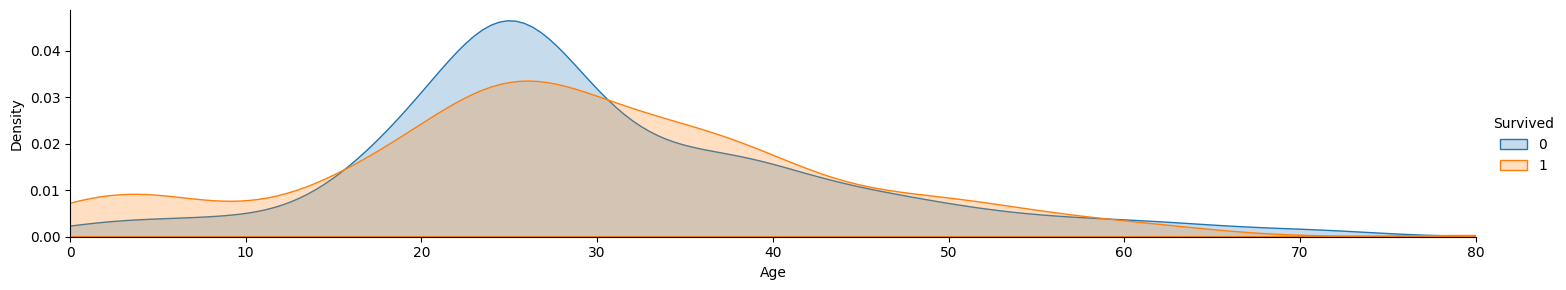

In [157]:
import seaborn as sns
fac = sns.FacetGrid(train_df, hue ="Survived", aspect = 5)
fac.map(sns.kdeplot, 'Age', fill=True)
fac.set(xlim = (0, train_df.Age.max()))
fac.add_legend()

In [158]:
train_df.loc[train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18), 'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 22), 'Age'] = 2
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 27), 'Age'] = 3
train_df.loc[(train_df['Age'] > 27) & (train_df['Age'] <= 33), 'Age'] = 4
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 40), 'Age'] = 5
train_df.loc[train_df['Age'] > 40, 'Age'] = 6
train_df['Age'] = train_df.Age.astype(int)
train_df.Age.value_counts()

3    242
6    150
4    137
5    131
2     92
1     71
0     68
Name: Age, dtype: int64

In [159]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,NamePrefix,Relative
0,0,3,0,2,0,8,3,1,1
1,1,1,1,5,3,3,1,3,1
2,1,3,1,3,1,8,3,2,0
3,1,1,1,5,3,3,3,3,1
4,0,3,0,5,1,8,3,1,0


In [160]:
X = train_df.drop("Survived", axis='columns')
y = train_df['Survived']

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [162]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.3, random_state = 1)
# create learning model
RF_model = RandomForestClassifier (n_estimators=50, max_depth=7, random_state=1)
# train the model
RF_model.fit(train_X, train_y)
# make predictions on the validation set
val_predictions = RF_model.predict(val_X)
# measure the model's performance
accuracy_score(val_y, val_predictions)

0.7835820895522388

In [163]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 5)
# create learning model
RF_model = RandomForestClassifier (n_estimators=50, max_depth=7, random_state=1)
# train the model
RF_model.fit(train_X, train_y)
# make predictions on the validation set
val_predictions = RF_model.predict(val_X)
# measure the model's performance
accuracy_score(val_y, val_predictions)

0.8435754189944135

In [164]:
test_df = pd.read_csv('/content/test.csv')

In [165]:
df = pd.read_csv('/content/test.csv')
test_df = test_df.drop("Ticket", axis='columns')

In [166]:
test_df['NamePrefix'] = test_df.Name.str.extract(' ([A-Za-z]+\.)', expand = False)
test_df = test_df.drop("Name", axis='columns')
test_df['NamePrefix'] = test_df.NamePrefix.map(NamePrefixDict)

In [167]:
test_df['Sex'] = test_df.Sex.map(SexDict)

In [168]:
test_df['Relative'] = test_df.SibSp + test_df.Parch
test_df['Relative'] = test_df.Relative.map(lambda x: 1 if (x > 0) else 0)
test_df = test_df.drop("SibSp", axis='columns')
test_df = test_df.drop("Parch", axis='columns')

In [169]:
test_df['Cabin'] = test_df.Cabin.fillna('Z')
test_df['Cabin'] = test_df.Cabin.map(lambda cabin: cabin[0])
test_df['Cabin'] = test_df.Cabin.map(CabinDict)

In [170]:
test_df['Embarked'] = test_df.Embarked.map(EmbarkedDict)

In [171]:
fareMean = test_df.Fare.mean()
test_df['Fare'] = test_df.Fare.fillna(fareMean)
test_df.loc[test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare']   = 2
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <= 99), 'Fare']   = 3
test_df.loc[(test_df['Fare'] > 99) & (test_df['Fare'] <= 250), 'Fare']   = 4
test_df.loc[test_df['Fare'] > 250, 'Fare'] = 5
test_df['Fare'] = test_df.Fare.astype(int)

In [172]:
Pclass1_ageMean = test_df.loc[test_df.Pclass == 1].Age.mean()
Pclass2_ageMean = test_df.loc[test_df.Pclass == 2].Age.mean()
Pclass3_ageMean = test_df.loc[test_df.Pclass == 3].Age.mean()
test_df.loc[test_df.Pclass == 1, 'Age'] = test_df.loc[test_df.Pclass == 1].Age.fillna(Pclass1_ageMean)
test_df.loc[test_df.Pclass == 2, 'Age'] = test_df.loc[test_df.Pclass == 2].Age.fillna(Pclass2_ageMean)
test_df.loc[test_df.Pclass == 3, 'Age'] = test_df.loc[test_df.Pclass == 3].Age.fillna(Pclass3_ageMean)
test_df.loc[test_df['Age'] <= 11, 'Age'] = 0
test_df.loc[(test_df['Age'] > 11) & (test_df['Age'] <= 18), 'Age'] = 1
test_df.loc[(test_df['Age'] > 18) & (test_df['Age'] <= 22), 'Age'] = 2
test_df.loc[(test_df['Age'] > 22) & (test_df['Age'] <= 27), 'Age'] = 3
test_df.loc[(test_df['Age'] > 27) & (test_df['Age'] <= 33), 'Age'] = 4
test_df.loc[(test_df['Age'] > 33) & (test_df['Age'] <= 40), 'Age'] = 5
test_df.loc[test_df['Age'] > 40, 'Age'] = 6
test_df['Age'] = test_df.Age.astype(int)

In [173]:
test_X = test_df.drop("PassengerId", axis='columns')

In [174]:
test_predictions = RF_model.predict(test_X)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)

In [175]:
! kaggle competitions submit -c titanic -f /content/gender_submission.csv -m version_3

100% 3.18k/3.18k [00:03<00:00, 942B/s]  
Successfully submitted to Titanic - Machine Learning from Disaster